In [ ]:
# API Secrets
API_KEY = "<SECRET_API_KEY>"
BASE_URL = "https://api.avalai.ir/v1/embeddings"
EMBEDDING_MODEL = "text-embedding-3-large"

In [ ]:
phrases = [
    "I love programming in Python",
    "Python is my favorite language",
    "I enjoy writing web applications",
    "The cat is sleeping on the sofa",
    "Dogs are very loyal animals",
    "I build machine learning models"
]

In [35]:
import requests
import numpy as np

def get_embeddings(texts):
    headers = {
        "Authorization": f"Bearer {API_KEY}",
        "Content-Type": "application/json"
    }

    payload = {
        "model": EMBEDDING_MODEL,
        "input": texts
    }

    response = requests.post(BASE_URL, headers=headers, json=payload)
    response.raise_for_status()

    data = response.json()["data"]
    embeddings = [item["embedding"] for item in data]

    return np.array(embeddings)


In [31]:
embeddings = get_embeddings(phrases)
print("Embedding shape:", embeddings.shape)


Embedding shape: (6, 3072)


In [32]:
from sklearn.decomposition import PCA

# 2D PCA
pca_2d = PCA(n_components=2)
embeddings_2d = pca_2d.fit_transform(embeddings)

# 3D PCA
pca_3d = PCA(n_components=3)
embeddings_3d = pca_3d.fit_transform(embeddings)


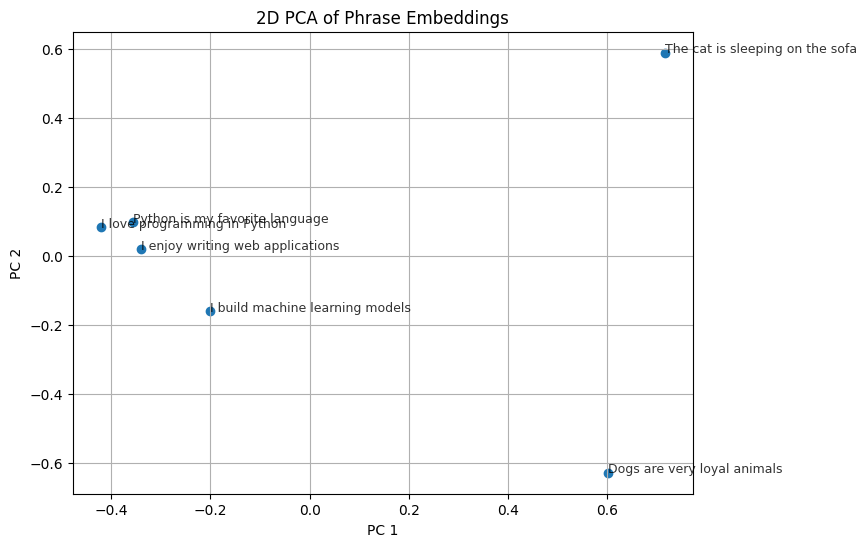

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

for i, phrase in enumerate(phrases):
    plt.annotate(
        phrase,
        (embeddings_2d[i, 0], embeddings_2d[i, 1]),
        fontsize=9,
        alpha=0.8
    )

plt.title("2D PCA of Phrase Embeddings")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()


In [41]:
phrases = [
    "Window",
    "Window of Opportunity",
    "Window of Context",
    "Window of the house",
    "Glass",
    "Chance"
]


phrases = [
    "king",
    "queen",
    "man",
    "woman",
    "son",
    "daughter"
]

In [42]:
embeddings = get_embeddings(phrases)
print("Embedding shape:", embeddings.shape)

Embedding shape: (6, 3072)


In [43]:
from sklearn.decomposition import PCA

# 2D PCA
pca_2d = PCA(n_components=2)
embeddings_2d = pca_2d.fit_transform(embeddings)

# 3D PCA
pca_3d = PCA(n_components=3)
embeddings_3d = pca_3d.fit_transform(embeddings)

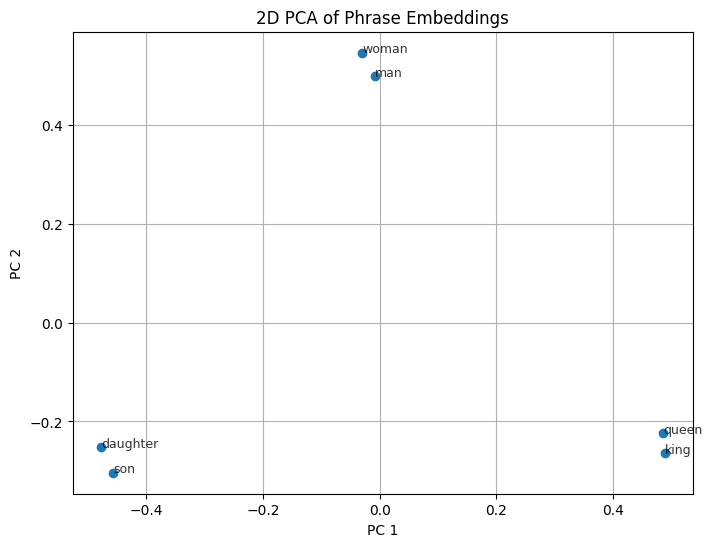

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

for i, phrase in enumerate(phrases):
    plt.annotate(
        phrase,
        (embeddings_2d[i, 0], embeddings_2d[i, 1]),
        fontsize=9,
        alpha=0.8
    )

plt.title("2D PCA of Phrase Embeddings")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()

In [34]:
import plotly.express as plotly

fig = plotly.scatter_3d(
    x=embeddings_3d[:, 0],
    y=embeddings_3d[:, 1],
    z=embeddings_3d[:, 2],
    text=phrases,
    title="3D PCA of Phrase Embeddings"
)

fig.update_traces(marker=dict(size=5))
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed